In [1]:
import pandas as pd
import numpy as np

#load data
traffic_data = pd.read_csv('rawpvr_2018-02-01_28d_1083 TueFri.csv')
traffic_data

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
0,2018-02-02 00:00:03.050000,6,SB_NS,2,South,38.525,NaN,NaN,0,NaN
1,2018-02-02 00:00:22.010000,5,SB_MID,2,South,32.310,NaN,NaN,0,NaN
2,2018-02-02 00:00:22.020000,4,SB_OS,2,South,44.739,NaN,NaN,0,NaN
3,2018-02-02 00:00:36.040000,6,SB_NS,2,South,33.554,NaN,NaN,0,NaN
4,2018-02-02 00:00:49.070000,6,SB_NS,2,South,39.768,12.300,11.847,0,NaN
...,...,...,...,...,...,...,...,...,...,...
503763,2018-02-27 23:59:00.090000,2,NB_MID,1,North,32.932,4.415,3.833,0,NaN
503764,2018-02-27 23:59:29.090000,6,SB_NS,2,South,29.825,65.500,64.700,0,NaN
503765,2018-02-27 23:59:32.050000,4,SB_OS,2,South,29.205,236.000,235.848,0,NaN
503766,2018-02-27 23:59:33.070000,6,SB_NS,2,South,37.283,3.330,3.462,0,NaN


In [2]:
#checking the sum of empyt values in coulumns 
traffic_data.isnull().sum()

Date                   0
Lane                   0
Lane Name              0
Direction              0
Direction Name         0
Speed (mph)           19
Headway (s)         9992
Gap (s)            14075
Flags                  0
Flag Text         503768
dtype: int64

In [3]:
# Calculating the mean for the specified columns
mean_values = traffic_data[['Speed (mph)', 'Headway (s)', 'Gap (s)']].mean()

# Filling missing values using the calculated means
traffic_data[['Speed (mph)', 'Headway (s)', 'Gap (s)']] = traffic_data[['Speed (mph)', 'Headway (s)', 'Gap (s)']].fillna(mean_values)
traffic_data

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
0,2018-02-02 00:00:03.050000,6,SB_NS,2,South,38.525,6.828993,6.404432,0,NaN
1,2018-02-02 00:00:22.010000,5,SB_MID,2,South,32.310,6.828993,6.404432,0,NaN
2,2018-02-02 00:00:22.020000,4,SB_OS,2,South,44.739,6.828993,6.404432,0,NaN
3,2018-02-02 00:00:36.040000,6,SB_NS,2,South,33.554,6.828993,6.404432,0,NaN
4,2018-02-02 00:00:49.070000,6,SB_NS,2,South,39.768,12.300000,11.847000,0,NaN
...,...,...,...,...,...,...,...,...,...,...
503763,2018-02-27 23:59:00.090000,2,NB_MID,1,North,32.932,4.415000,3.833000,0,NaN
503764,2018-02-27 23:59:29.090000,6,SB_NS,2,South,29.825,65.500000,64.700000,0,NaN
503765,2018-02-27 23:59:32.050000,4,SB_OS,2,South,29.205,236.000000,235.848000,0,NaN
503766,2018-02-27 23:59:33.070000,6,SB_NS,2,South,37.283,3.330000,3.462000,0,NaN


In [4]:
traffic_data.dtypes

Date               object
Lane                int64
Lane Name          object
Direction           int64
Direction Name     object
Speed (mph)       float64
Headway (s)       float64
Gap (s)           float64
Flags               int64
Flag Text         float64
dtype: object

In [8]:
traffic_data.isnull().sum()

Date                   0
Lane                   0
Lane Name              0
Direction              0
Direction Name         0
Speed (mph)            0
Headway (s)            0
Gap (s)                0
Flags                  0
Flag Text         503768
dtype: int64

In [17]:

# Converting the 'Date' column to a datetime object for easier manipulation. coerce is used to handle inconsistent formats
traffic_data['Date'] = pd.to_datetime(traffic_data['Date'], errors='coerce')

#dropping any invlaid rows after conversion
traffic_data = traffic_data.dropna(subset=['Date'])

# Assign 'Tuesday' or 'Friday' based on the day of the week
traffic_data['Flags'] = traffic_data['Date'].dt.dayofweek.map({1: 2, 4: 5})  # 1 is Tuesday, 4 is Friday
traffic_data['Flag Text'] = traffic_data['Date'].dt.day_name().where(traffic_data['Date'].dt.dayofweek.isin([1, 4]))


In [47]:
#final data output after updating flags flag text
traffic_data

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
0,2018-02-02 00:00:03.050,6,SB_NS,2,South,38.525,6.828993,6.404432,5,Friday
1,2018-02-02 00:00:22.010,5,SB_MID,2,South,32.310,6.828993,6.404432,5,Friday
2,2018-02-02 00:00:22.020,4,SB_OS,2,South,44.739,6.828993,6.404432,5,Friday
3,2018-02-02 00:00:36.040,6,SB_NS,2,South,33.554,6.828993,6.404432,5,Friday
4,2018-02-02 00:00:49.070,6,SB_NS,2,South,39.768,12.300000,11.847000,5,Friday
...,...,...,...,...,...,...,...,...,...,...
503763,2018-02-27 23:59:00.090,2,NB_MID,1,North,32.932,4.415000,3.833000,2,Tuesday
503764,2018-02-27 23:59:29.090,6,SB_NS,2,South,29.825,65.500000,64.700000,2,Tuesday
503765,2018-02-27 23:59:32.050,4,SB_OS,2,South,29.205,236.000000,235.848000,2,Tuesday
503766,2018-02-27 23:59:33.070,6,SB_NS,2,South,37.283,3.330000,3.462000,2,Tuesday


Quesion 2.I

In [23]:
#Filtering rows for Tuesdays (dayofweek == 1) and time between 9:00 and 9:59 AM
north_lanes_tuesday  = traffic_data[
    (traffic_data['Date'].dt.dayofweek == 1) & 
    (traffic_data['Direction Name'] == 'North') &
    (traffic_data['Date'].dt.hour == 9)
]

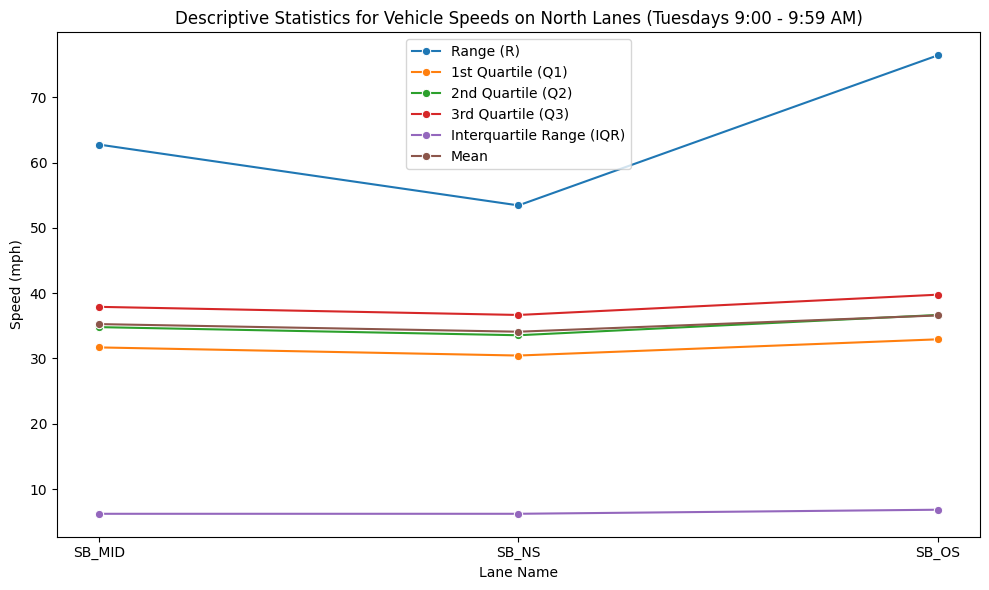

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by lane and calculate descriptive statistics for vehicle speeds
north_lane_speeds = north_lanes_tuesday.groupby('Lane Name')['Speed (mph)'].describe()

# Calculating the Range (R) as max - min
north_lane_speeds['Range (R)'] = north_lane_speeds['max'] - north_lane_speeds['min']

# Calculating the Interquartile Range (IQR) as 75th percentile (Q3) - 25th percentile (Q1)
north_lane_speeds['IQR'] = north_lane_speeds['75%'] - north_lane_speeds['25%']

# Creating a new DataFrame with relevant descriptive statistics (Range, Quartiles, IQR, and Mean)
north_lane_speeds_profile = north_lane_speeds[['Range (R)', '25%', '50%', '75%', 'IQR', 'mean']]

# Renaming columns for clarity
north_lane_speeds_profile.columns = ['Range (R)', '1st Quartile (Q1)', '2nd Quartile (Q2)', '3rd Quartile (Q3)', 'Interquartile Range (IQR)', 'Mean']

# Resetting index to make 'Lane Name' a column for easier plotting
north_lane_speeds_profile = north_lane_speeds_profile.reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))

# Plotting each measure as a line
sns.lineplot(x='Lane Name', y='Range (R)', data=north_lane_speeds_profile, marker='o', label='Range (R)')
sns.lineplot(x='Lane Name', y='1st Quartile (Q1)', data=north_lane_speeds_profile, marker='o', label='1st Quartile (Q1)')
sns.lineplot(x='Lane Name', y='2nd Quartile (Q2)', data=north_lane_speeds_profile, marker='o', label='2nd Quartile (Q2)')
sns.lineplot(x='Lane Name', y='3rd Quartile (Q3)', data=north_lane_speeds_profile, marker='o', label='3rd Quartile (Q3)')
sns.lineplot(x='Lane Name', y='Interquartile Range (IQR)', data=north_lane_speeds_profile, marker='o', label='Interquartile Range (IQR)')
sns.lineplot(x='Lane Name', y='Mean', data=north_lane_speeds_profile, marker='o', label='Mean')

# Setting plot labels and title
plt.title('Descriptive Statistics for Vehicle Speeds on North Lanes (Tuesdays 9:00 - 9:59 AM)')
plt.xlabel('Lane Name')
plt.ylabel('Speed (mph)')
plt.legend()

# Ensuring everything fits
plt.tight_layout()
plt.show()


In [46]:
north_lane_speeds_profile

,Lane Name,Range (R),1st Quartile (Q1),2nd Quartile (Q2),3rd Quartile (Q3),Interquartile Range (IQR),Mean
0,SB_MID,62.757,31.691,34.798,37.903,6.212,35.262836
1,SB_NS,53.438,30.447,33.554,36.661,6.214,34.095192
2,SB_OS,76.430,32.932,36.661,39.768,6.836,36.591979


Question 2.II

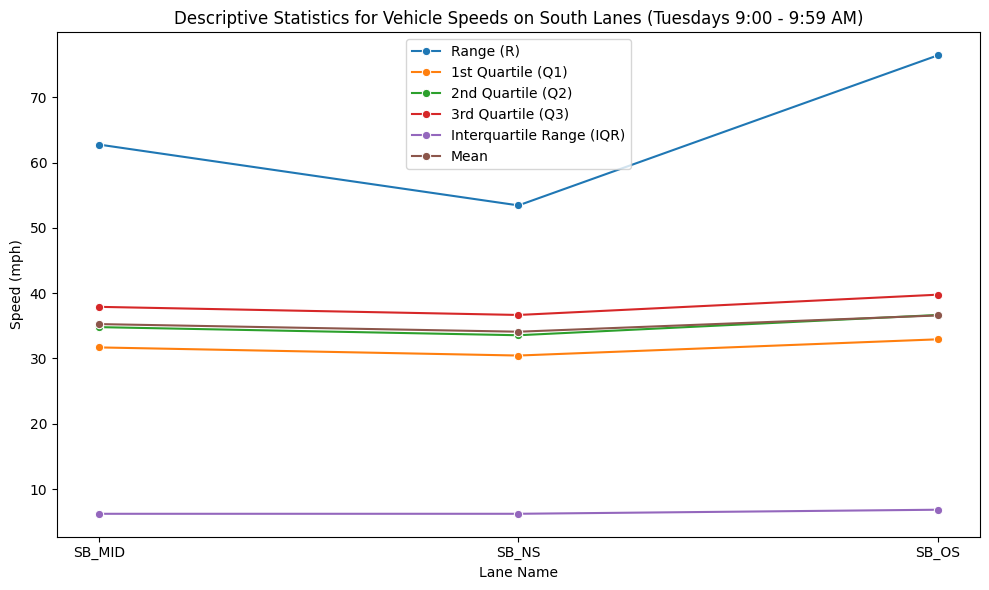

In [40]:
# Filtering rows for Tuesdays (dayofweek == 1) and time between 9:00 and 9:59 AM for South Lanes
south_lanes_tuesday  = traffic_data[
    (traffic_data['Date'].dt.dayofweek == 1) & 
    (traffic_data['Direction Name'] == 'South') &
    (traffic_data['Date'].dt.hour == 9)
]

# Grouping by lane and calculate descriptive statistics for vehicle speeds
south_lane_speeds = south_lanes_tuesday.groupby('Lane Name')['Speed (mph)'].describe()

# Calculating the Range (R) as max - min
south_lane_speeds['Range (R)'] = south_lane_speeds['max'] - south_lane_speeds['min']

# Calculating the Interquartile Range (IQR) as 75% - 25%
south_lane_speeds['IQR'] = south_lane_speeds['75%'] - south_lane_speeds['25%']

# Creating a new DataFrame with relevant descriptive statistics (Range, Quartiles, IQR, and Mean)
south_lane_speeds_profile = south_lane_speeds[['Range (R)', '25%', '50%', '75%', 'IQR', 'mean']]

# Renaming columns for clarity
south_lane_speeds_profile.columns = ['Range (R)', '1st Quartile (Q1)', '2nd Quartile (Q2)', '3rd Quartile (Q3)', 'Interquartile Range (IQR)', 'Mean']

# Resetting index to make 'Lane Name' a column for easier plotting
south_lane_speeds_profile = south_lane_speeds_profile.reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))

# Plotting each measure as a line
sns.lineplot(x='Lane Name', y='Range (R)', data=south_lane_speeds_profile, marker='o', label='Range (R)')
sns.lineplot(x='Lane Name', y='1st Quartile (Q1)', data=south_lane_speeds_profile, marker='o', label='1st Quartile (Q1)')
sns.lineplot(x='Lane Name', y='2nd Quartile (Q2)', data=south_lane_speeds_profile, marker='o', label='2nd Quartile (Q2)')
sns.lineplot(x='Lane Name', y='3rd Quartile (Q3)', data=south_lane_speeds_profile, marker='o', label='3rd Quartile (Q3)')
sns.lineplot(x='Lane Name', y='Interquartile Range (IQR)', data=south_lane_speeds_profile, marker='o', label='Interquartile Range (IQR)')
sns.lineplot(x='Lane Name', y='Mean', data=south_lane_speeds_profile, marker='o', label='Mean')

# Setting plot labels and title
plt.title('Descriptive Statistics for Vehicle Speeds on South Lanes (Tuesdays 9:00 - 9:59 AM)')
plt.xlabel('Lane Name')
plt.ylabel('Speed (mph)')
plt.legend()

# Ensuring everything fits
plt.tight_layout()
plt.show()

In [41]:
south_lane_speeds_profile

,Lane Name,Range (R),1st Quartile (Q1),2nd Quartile (Q2),3rd Quartile (Q3),Interquartile Range (IQR),Mean
0,SB_MID,62.757,31.691,34.798,37.903,6.212,35.262836
1,SB_NS,53.438,30.447,33.554,36.661,6.214,34.095192
2,SB_OS,76.430,32.932,36.661,39.768,6.836,36.591979


Question 2.III

C:\Users\salij\AppData\Local\Temp\ipykernel_20088\2266214936.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuesday_traffic['Traffic Volume'] = np.where(


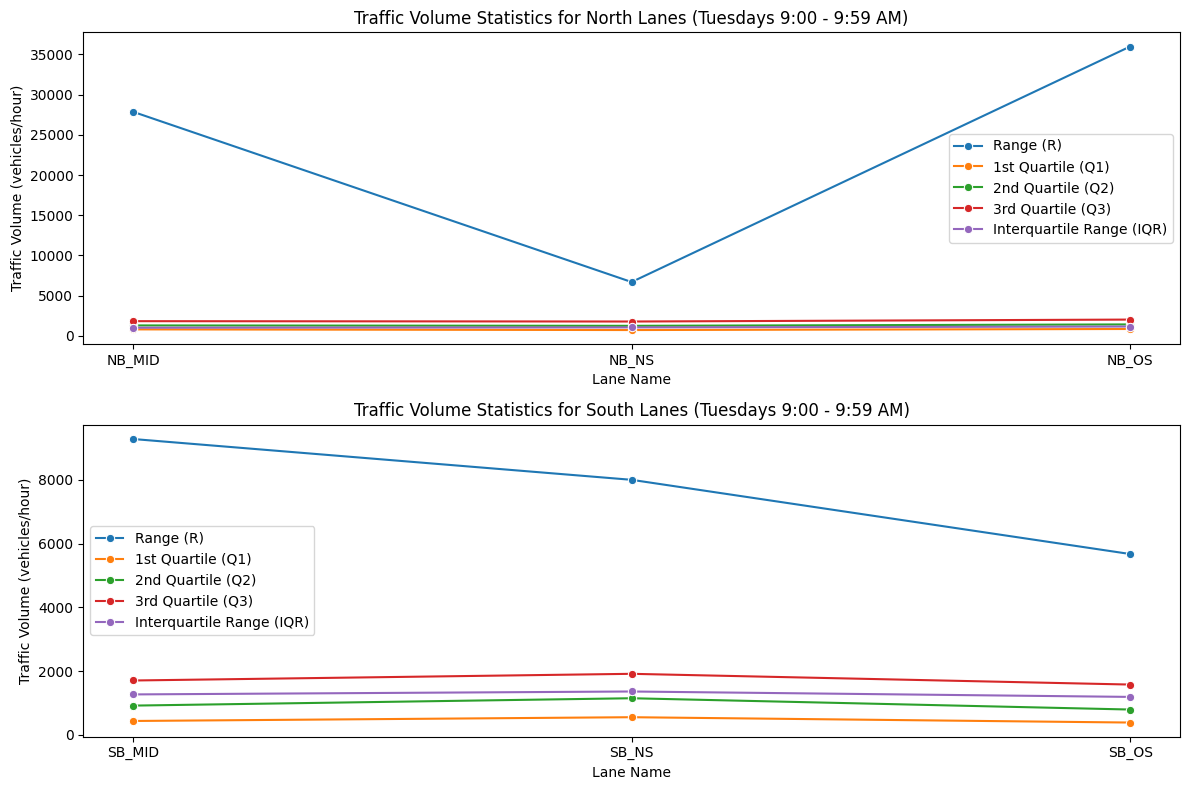

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtering data for Tuesdays, between 9:00 AM and 9:59 AM
tuesday_traffic = traffic_data[
    (traffic_data['Date'].dt.dayofweek == 1) &  # 1 is Tuesday
    (traffic_data['Date'].dt.hour == 9)  # Between 9:00 AM and 9:59 AM
]

# Handling possible division by zero or nulls in Headway (s)
tuesday_traffic['Traffic Volume'] = np.where(
    tuesday_traffic['Headway (s)'] > 0, 
    3600 / tuesday_traffic['Headway (s)'], 
    np.nan  # Assigning NaN for invalid values (e.g., headway of 0 or negative)
)

# Function to calculate descriptive statistics for a given direction (North/South)
def calculate_traffic_volume_stats(direction):
   
    # Filtering for the specified direction (North/South)
    direction_traffic = tuesday_traffic[tuesday_traffic['Direction Name'] == direction]
    
    # Grouping by lane and calculate descriptive statistics for traffic volume
    direction_volume_stats = direction_traffic.groupby('Lane Name')['Traffic Volume'].describe()
    
    # Calculating the Range (R) as max - min
    direction_volume_stats['Range (R)'] = direction_volume_stats['max'] - direction_volume_stats['min']
    
    # Calculating the Interquartile Range (IQR) as 75% - 25%
    direction_volume_stats['IQR'] = direction_volume_stats['75%'] - direction_volume_stats['25%']
    
    # Selecting relevant columns (Range, Q1, Q2, Q3, IQR)
    direction_volume_profile = direction_volume_stats[['Range (R)', '25%', '50%', '75%', 'IQR']]
    direction_volume_profile.columns = ['Range (R)', '1st Quartile (Q1)', '2nd Quartile (Q2)', '3rd Quartile (Q3)', 'Interquartile Range (IQR)']
    
    # Resetting index for easier plotting
    direction_volume_profile = direction_volume_profile.reset_index()
    
    return direction_volume_profile

# Calculating descriptive statistics for North lanes
north_volume_profile = calculate_traffic_volume_stats('North')

# Calculating descriptive statistics for South lanes
south_volume_profile = calculate_traffic_volume_stats('South')

# Plotting the North and South traffic volume profiles
plt.figure(figsize=(12, 8))

# Plot for North lanes
plt.subplot(2, 1, 1)  # Two rows, one column, first plot
sns.lineplot(x='Lane Name', y='Range (R)', data=north_volume_profile, marker='o', label='Range (R)')
sns.lineplot(x='Lane Name', y='1st Quartile (Q1)', data=north_volume_profile, marker='o', label='1st Quartile (Q1)')
sns.lineplot(x='Lane Name', y='2nd Quartile (Q2)', data=north_volume_profile, marker='o', label='2nd Quartile (Q2)')
sns.lineplot(x='Lane Name', y='3rd Quartile (Q3)', data=north_volume_profile, marker='o', label='3rd Quartile (Q3)')
sns.lineplot(x='Lane Name', y='Interquartile Range (IQR)', data=north_volume_profile, marker='o', label='Interquartile Range (IQR)')
plt.title('Traffic Volume Statistics for North Lanes (Tuesdays 9:00 - 9:59 AM)')
plt.xlabel('Lane Name')
plt.ylabel('Traffic Volume (vehicles/hour)')
plt.legend()

# Plot for South lanes
plt.subplot(2, 1, 2)  # Two rows, one column, second plot
sns.lineplot(x='Lane Name', y='Range (R)', data=south_volume_profile, marker='o', label='Range (R)')
sns.lineplot(x='Lane Name', y='1st Quartile (Q1)', data=south_volume_profile, marker='o', label='1st Quartile (Q1)')
sns.lineplot(x='Lane Name', y='2nd Quartile (Q2)', data=south_volume_profile, marker='o', label='2nd Quartile (Q2)')
sns.lineplot(x='Lane Name', y='3rd Quartile (Q3)', data=south_volume_profile, marker='o', label='3rd Quartile (Q3)')
sns.lineplot(x='Lane Name', y='Interquartile Range (IQR)', data=south_volume_profile, marker='o', label='Interquartile Range (IQR)')
plt.title('Traffic Volume Statistics for South Lanes (Tuesdays 9:00 - 9:59 AM)')
plt.xlabel('Lane Name')
plt.ylabel('Traffic Volume (vehicles/hour)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [43]:
north_volume_profile

,Lane Name,Range (R),1st Quartile (Q1),2nd Quartile (Q2),3rd Quartile (Q3),Interquartile Range (IQR)
0,NB_MID,27858.196256,814.986770,1306.715064,1837.672282,1022.685511
1,NB_NS,6700.888055,733.683243,1257.422438,1793.499319,1059.816077
2,NB_OS,35968.085106,864.449825,1433.121019,2034.473177,1170.023352


In [44]:
south_volume_profile

,Lane Name,Range (R),1st Quartile (Q1),2nd Quartile (Q2),3rd Quartile (Q3),Interquartile Range (IQR)
0,SB_MID,9276.632339,436.379665,918.133129,1705.353296,1268.973631
1,SB_NS,7997.368714,554.401110,1149.058410,1914.893617,1360.492507
2,SB_OS,5670.859900,387.096774,794.965230,1578.083612,1190.986837


Question 3.I

C:\Users\salij\AppData\Local\Temp\ipykernel_20088\2375242337.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Traffic Volume'] = 3600 / filtered_data['Headway (s)']


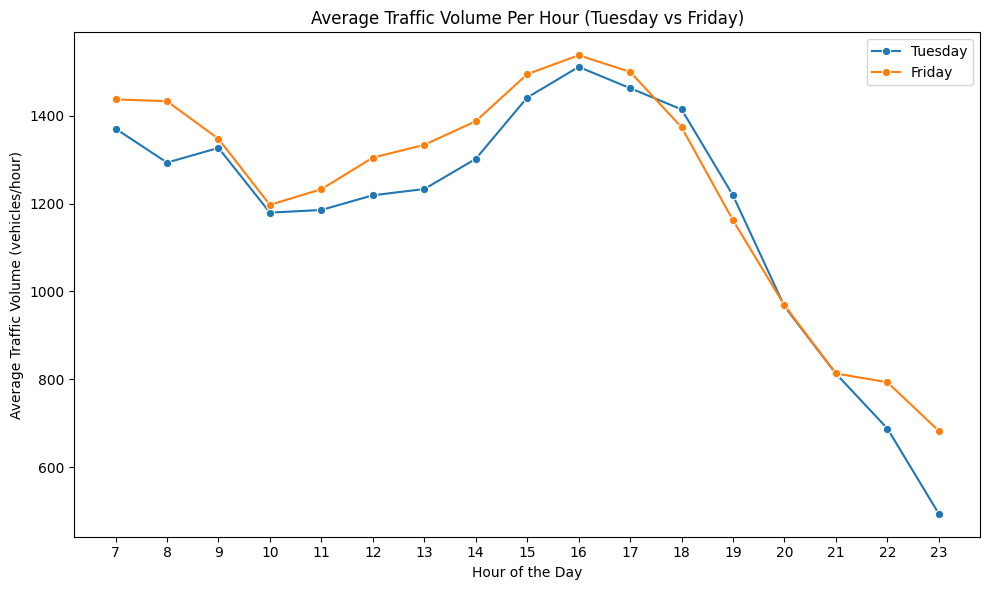

In [48]:
# Filtering for times between 07:00:00 and 23:59:59
filtered_data = traffic_data[
    (traffic_data['Date'].dt.hour >= 7) &
    (traffic_data['Date'].dt.hour <= 23)
]

# Calculating traffic volume (vehicles per hour) = 3600 / Headway (s)
filtered_data['Traffic Volume'] = 3600 / filtered_data['Headway (s)']

# Function to calculate average traffic volume per hour for a given day of the week (Tuesday/Friday)
def calculate_avg_volume(day_name):
    # Filtering for the specific day (1 = Tuesday, 4 = Friday)
    day_data = filtered_data[filtered_data['Date'].dt.dayofweek == (1 if day_name == 'Tuesday' else 4)]
    
    # Grouping by hour and calculate average traffic volume per hour
    avg_volume_by_hour = day_data.groupby(day_data['Date'].dt.hour)['Traffic Volume'].mean()
    
    return avg_volume_by_hour

# Calculating average traffic volume per hour for Tuesday
avg_volume_tuesday = calculate_avg_volume('Tuesday')

# Calculating average traffic volume per hour for Friday
avg_volume_friday = calculate_avg_volume('Friday')

# Plotting the average traffic volume for both Tuesday and Friday
plt.figure(figsize=(10, 6))

# Lineplot for Tuesday
sns.lineplot(x=avg_volume_tuesday.index, y=avg_volume_tuesday.values, marker='o', label='Tuesday')

# Lineplot for Friday
sns.lineplot(x=avg_volume_friday.index, y=avg_volume_friday.values, marker='o', label='Friday')

# plot labels and title
plt.title('Average Traffic Volume Per Hour (Tuesday vs Friday)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume (vehicles/hour)')
plt.xticks(range(7, 24))  # Set x-axis to show hours from 07:00 to 23:00
plt.legend()

# Showing the plot with a tight layout
plt.tight_layout()
plt.show()

In [57]:
avg_volume_tuesday

Date
7     1370.745592
8     1293.401012
9     1326.855286
10    1179.551780
11    1185.565865
12    1219.008939
13    1233.244532
14    1301.893037
15    1441.449257
16    1511.235975
17    1462.913748
18    1414.464009
19    1218.597670
20     966.123165
21     813.071427
22     688.020302
23     493.974292
Name: Traffic Volume, dtype: float64

In [58]:
avg_volume_friday

Date
7     1437.315266
8     1433.162837
9     1347.528397
10    1197.170629
11    1232.890420
12    1304.703939
13    1333.849700
14    1387.532606
15    1494.601350
16    1537.760285
17    1500.013119
18    1374.044122
19    1162.115040
20     968.696596
21     813.374879
22     793.357718
23     682.747769
Name: Traffic Volume, dtype: float64

In [59]:
#converting the dataframe back to csv to use in manipulate using MySQL
traffic_data.to_csv('rawpvr_2018-02-01_28d_1083 clean TueFri.csv', index=False)